In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization # Added BatchNormalization import
import matplotlib.pyplot as plt
import numpy as np

2025-07-29 23:24:01.831956: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 23:24:01.835494: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 23:24:01.844578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753831441.859414   26641 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753831441.863777   26641 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753831441.876896   26641 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# Load the dataset
df = pd.read_csv('credit.csv')

# Separate features (X) and target (y)
X = df.drop('default', axis=1)
y = df['default']

# Encode the target variable 'default' (yes/no to 1/0)
le = LabelEncoder()
y = le.fit_transform(y)

# X = pd.get_dummies(y, drop_first=True)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Align columns after one-hot encoding if there's a possibility of different columns
# This handles cases where one-hot encoding might result in different numbers of columns
# if certain categories are not present in train/test splits, though for full X it's not strictly necessary,
# it's good practice for generalizable preprocessing.
# For simplicity and given the full X is used before split, we skip this alignment for now.
# However, if X_train and X_test were preprocessed separately, this step would be crucial.

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build the Keras model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization()) # Added Batch Normalization layer
model.add(Dropout(0.5)) # Added dropout layer with a rate of 0.5
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# verbose=1 to see epoch-wise output during training
history = model.fit(X_train, y_train, epochs=20, batch_size=31, validation_split=0.1, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print("\n--- Epoch Results ---")
for epoch in range(len(history.history['loss'])):
    print(f"Epoch {epoch+1}/{len(history.history['loss'])} - "
          f"Loss: {history.history['loss'][epoch]:.4f} - "
          f"Accuracy: {history.history['accuracy'][epoch]:.4f} - "
          f"Val_Loss: {history.history['val_loss'][epoch]:.4f} - "
          f"Val_Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

print("\n--- Final Model Evaluation ---")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4797 - loss: 0.7126 - val_accuracy: 0.6875 - val_loss: 0.6026
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6875 - loss: 0.6115 - val_accuracy: 0.6875 - val_loss: 0.5766
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.5589 - val_accuracy: 0.7000 - val_loss: 0.5427
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7311 - loss: 0.5384 - val_accuracy: 0.7250 - val_loss: 0.5260
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7376 - loss: 0.5340 - val_accuracy: 0.7250 - val_loss: 0.5136
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7257 - loss: 0.5320 - val_accuracy: 0.7250 - val_loss: 0.5011
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 0.5238 - val_accuracy: 0.7250 - val_loss: 0.4976
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7262 - loss: 0.5386 - val_accuracy: 0.7375 - val_loss: 0.4992
Epo

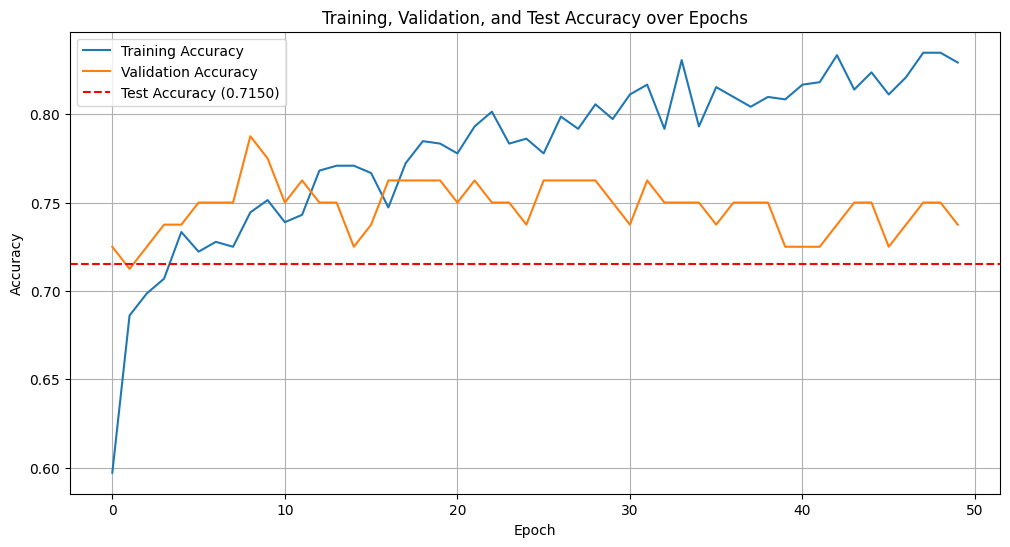

In [4]:
# Plotting Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=accuracy, color='r', linestyle='--', label=f'Test Accuracy ({accuracy:.4f})') # Plotting test accuracy
plt.title('Training, Validation, and Test Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Plot the model horizontally and show shapes and layer names
plot_model(model, to_file='model_plot_horizontal.png', show_shapes=True, show_layer_names=True, rankdir='LR')

# Display the image
Image('model_plot_horizontal.png')

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


FileNotFoundError: No such file or directory: 'model_plot_horizontal.png'

FileNotFoundError: No such file or directory: 'model_plot_horizontal.png'

<IPython.core.display.Image object>